# Contents
### Importing Libraries and Data 
### Create bar chart, histogram and line chart
### Provide the Instacart senior stakeholders with descriptive findings about sales
### Distribution of orders among customers in terms of loyalty
### Conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns
### Conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns

In [15]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [16]:
# Import Data
path = r'/Users/maitran/Documents/Instacart Basket Analysis'

In [17]:
# Import the customer_data_set dataframe
df_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_merged.pkl'))

In [18]:
df_combined.head()

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,date_joined,number_of_dependants,fam_status,income,True
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


### Step 2: Create bar chart, histogram and line chart

##### a. Bar chart

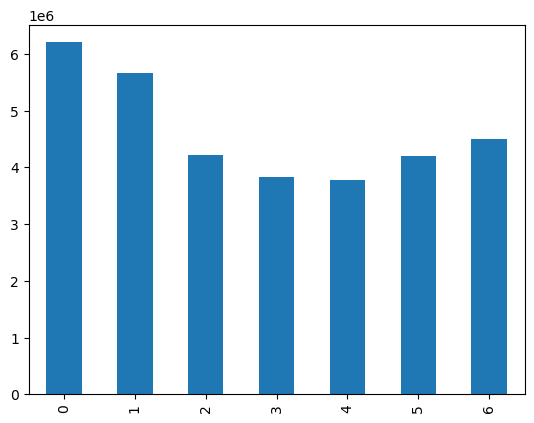

In [19]:
# Create a bar chart sort by index for column order_day_of_week
bar = df_combined['order_day_of_week'].value_counts().sort_index().plot.bar()

In [20]:
# Export bar chart 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

##### b. Scatterplot

<AxesSubplot:xlabel='prices', ylabel='prices'>

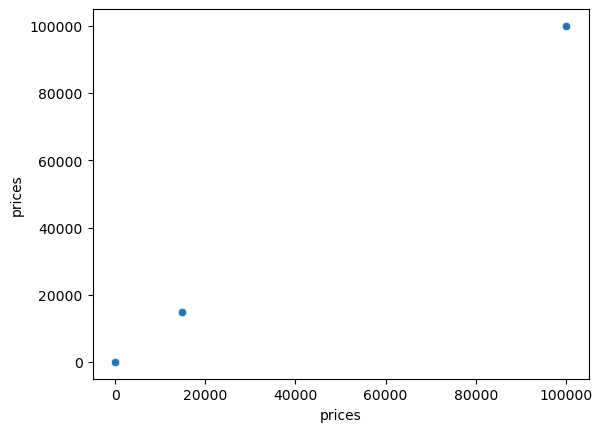

In [21]:
# Create a scatterplot to find outliers
sns.scatterplot(x = 'prices', y = 'prices',data = df_combined)

##### Observation: Two data points far beyond values we’d expect, value to 20,000 and even 100,000. This close-to-100,000 value corresponds to the max value we identified in our checks. But we need further investigation on close-to-20,000 value.

In [22]:
# Look for items over $100 (outlier)
df_combined.loc[df_combined['prices'] > 100]

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,date_joined,number_of_dependants,fam_status,income,True
7805,1435153,1519,prior,26,2,11,6.0,21553,15,0,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
7806,1066435,1519,prior,32,3,10,5.0,21553,28,1,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
15143,1697208,2409,prior,33,1,19,5.0,21553,1,0,...,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074,both
20264,965345,3531,prior,27,2,19,8.0,33664,2,0,...,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776,both
20497,2943740,3793,prior,1,2,9,NaN,21553,3,0,...,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,prior,4,1,17,13.0,33664,2,1,...,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497,both
32307882,1179092,131671,prior,12,4,9,15.0,33664,1,0,...,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490,both
32310810,1226705,39667,prior,7,2,15,20.0,33664,14,0,...,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077,both
32330048,3000037,95105,prior,2,4,19,22.0,33664,4,0,...,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880,both


##### Observation: There are 5,127 rows with outlier observations (prices greater than 100). In addition, at the top of the “prices” column, we can see that there’s another odd value, 14,900.00, which corresponds to the second unexplainable point in the scatterplot. Following this is the 99,999.00 we identified previously. As such, we can assume that it’s the 14,900.00 and 99,999.00 values that are skewing our charts.

In [24]:
# Mark them as missing since they don’t make sense in terms of the other values in the column
df_combined.loc[df_combined['prices'] >100, 'prices'] = np.nan

In [25]:
# Check whether the replacement was successful by running a max-value check on your “prices” column
df_combined['prices'].max()

25.0

##### c. Histogram

<AxesSubplot:ylabel='Frequency'>

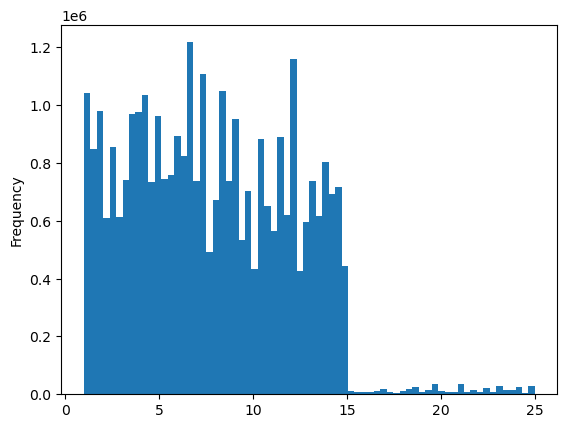

In [26]:
# Create histogram of “prices” column
df_combined['prices'].plot.hist(bins = 70)

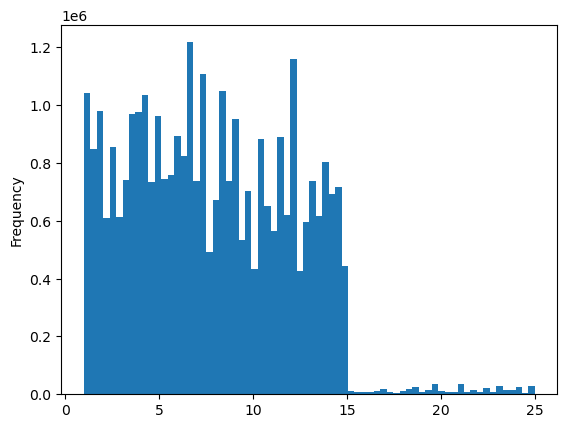

In [27]:
#  Save histogram within the hist object
hist = df_combined['prices'].plot.hist(bins = 70)

In [29]:
# Export histogram outside of Jupyter in the form of an image file
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices.png'))

##### d. Line chart

##### Note: In order to make a line chart more effectively we will use a subset of the dataframe. As opposed to just arbitrarily choosing rows, we will create a random representative sample of 70% of the data

In [31]:
# first we assign random numbers between 0-1 to a list then length of the dataframe
# then make an array (dev) containing the values less than or equal to 0.7
# we will use seed 4 in the random number generator for consistency
np.random.seed(4)
dev = np.random.rand(len(df_combined)) <= 0.7

In [32]:
# we can then split the data frame 70/30 using the values list in dev (70%) , and not in dev (30%)
big = df_combined[dev]

In [33]:
# 30 percent in the smaller dataframe
small = df_combined[~dev]

In [35]:
# check that the number of rows match the data frame length
len(df_combined)

32404859

In [36]:
# the data frame length should equal the two subsets added together
len(big) + len(small)

32404859

In [38]:
# divide the database futher into only the columns we need to make the line chart
df_combined_2 = small [['order_day_of_week', 'prices']]

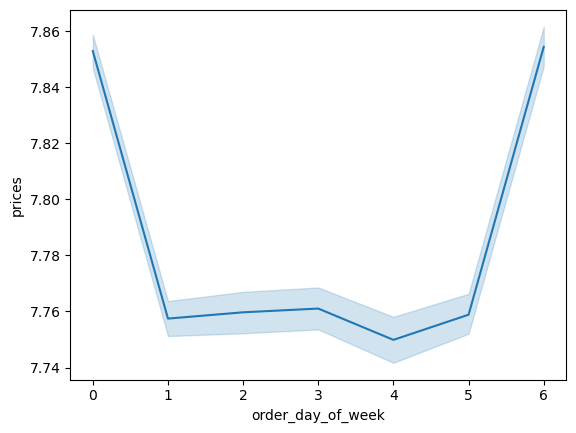

In [39]:
# line chart stored in the variable 'line'
line = sns.lineplot(data = df_combined_2, x = 'order_day_of_week', y = 'prices')

In [40]:
# export the line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_ords_dow.png'))

### Step 3: Provide the Instacart senior stakeholders with descriptive findings about sales

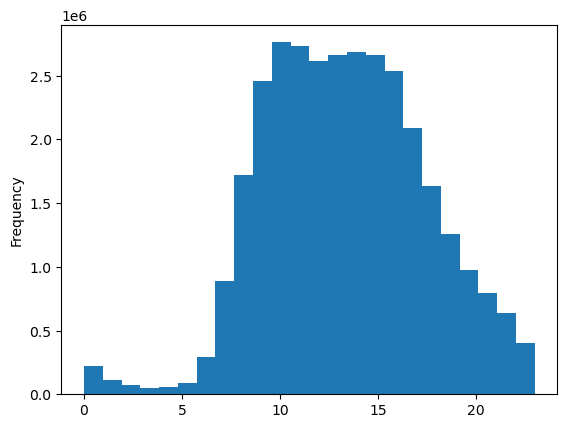

In [42]:
# Create a histogram of the “order_hour_of_day” column
hist_hour = df_combined['order_hour_of_day'].plot.hist(bins = 24)

##### Observation: The histogram represents the frequency of orders for each hour of the day. The peak time, when most orders are placed, is  around 10-17 which would be 10am to 5pm.

In [43]:
# export the histogram
hist_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_hour_order.png'))

### Step 4: Distribution of orders among customers in terms of loyalty

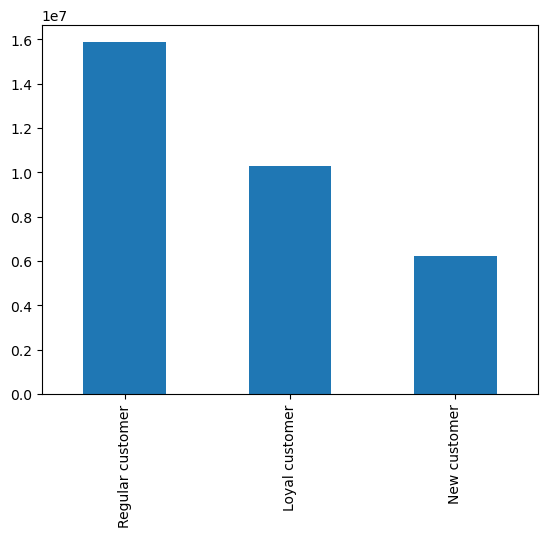

In [44]:
# Create a bar chart from the “loyalty_flag” column
bar_cus = df_combined['loyalty_flag'].value_counts().plot.bar()

In [45]:
# Export bar chart 
bar_cus.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_loyalty.png'))

### Step 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [48]:
# create small dataframe with the columns we need
df_combined_3 = small [['order_hour_of_day', 'prices']]

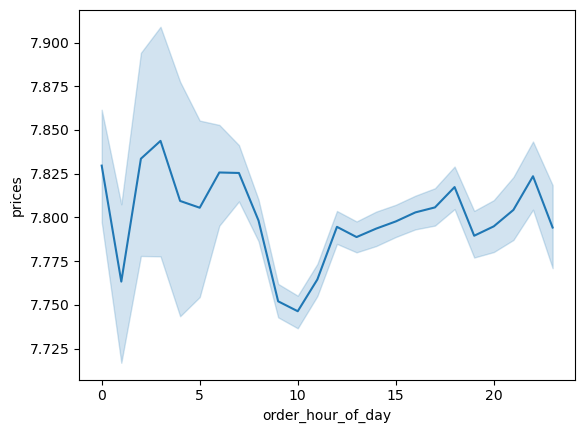

In [49]:
# line chart stored in the variable 'line_hour'
line_hour = sns.lineplot(data = df_combined_3, x = 'order_hour_of_day', y = 'prices')

##### Observation: There is not much differences in customer's spending depending on the hour of the day. The price doesn't fluctuate much, just between 7.725 to 7.9


In [55]:
# export the line chart
line_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_spending.png'))

### Step 6: Conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns

##### Note: Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [50]:
# create small dataframe with the columns we need
df_combined_4 = small [['age', 'number_of_dependants']]

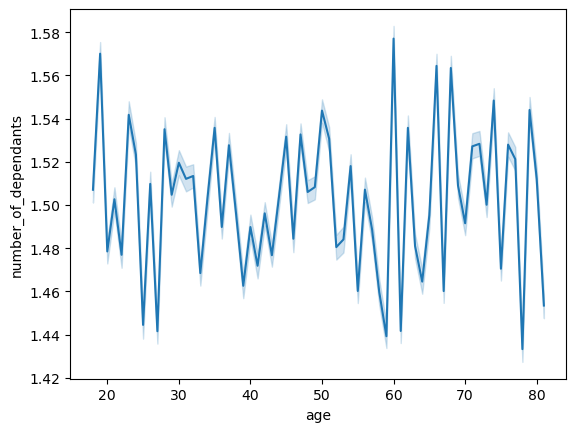

In [51]:
# line chart stored in the variable 'line_age_connection'
line_age_connection = sns.lineplot(data = df_combined_4, x = 'age', y = 'number_of_dependants')

##### Observation: The line chart shows that there is not really a clear trend between age and dependants for adults who are over 18.

In [56]:
# export the line chart
line_age_connection.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age.png'))

### Step 7: Analyze to see whether there’s a connection between age and spending power (income), by create a scatterplot using the sns.scatterplot() function

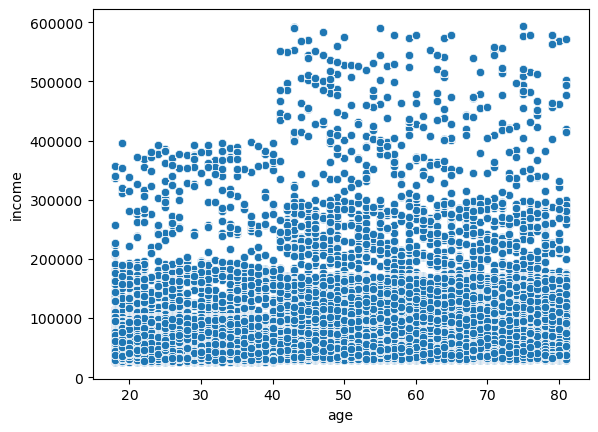

In [58]:
# Create a scatterplot 
scatter_income = sns.scatterplot(x = 'age', y = 'income',data = df_combined)

##### Observation: This scatterplot shows that people from 40 and above have higher income than the younger people.

In [60]:
# export the scatterplot
scatter_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_income.png'))